# Exploratory Data Analysis (EDA): Bank Telemarketing Campaign

### Understanding the Dataset 
##### a. Load and scrutinize the dataset to comprehend its structure, encompassing columns and data types.

In [3]:
# Importing necessary libraries and reading the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)
df = pd.read_csv(r"C:\Users\drbus\STUDY\APBADS\Python\Bank_Telemarketing\bank_marketing_updated_v1.csv")
df.head()

banking marketing Unnamed: 1                    Unnamed: 2 Unnamed: 3  \
0  customer id and age.        NaN  Customer salary and balance.        NaN   
1            customerid        age                        salary    balance   
2                     1         58                        100000       2143   
3                     2         44                         60000         29   
4                     3         33                        120000          2   

                                          Unnamed: 4              Unnamed: 5  \
0  Customer marital status and job with education...                     NaN   
1                                            marital                  jobedu   
2                                            married     management,tertiary   
3                                             single    technician,secondary   
4                                            married  entrepreneur,secondary   

                                   Unnamed: 6 Unnamed: 7  \
0  particular customer before targeted or not        NaN   
1                                    targeted    default   
2                                         yes         no   
3                                         yes         no   
4                                         yes         no   

                           Unnamed: 8 Unnamed: 9   Unnamed: 10 Unnamed: 11  \
0  Loan types: loans or housing loans        NaN  Contact type         NaN   
1                             housing       loan       contact         day   
2                                 yes         no       unknown           5   
3                                 yes         no       unknown           5   
4                                 yes        yes       unknown           5   

        Unnamed: 12       Unnamed: 13 Unnamed: 14 Unnamed: 15 Unnamed: 16  \
0  month of contact  duration of call         NaN         NaN         NaN   
1             month          duration    campaign       pdays    previous   
2         may, 2017           261 sec           1          -1           0   
3         may, 2017           151 sec           1          -1           0   
4         may, 2017            76 sec           1          -1           0   

                   Unnamed: 17                              Unnamed: 18  
0  outcome of previous contact  response of customer after call happned  
1                     poutcome                                 response  
2                      unknown                                       no  
3                      unknown                                       no  
4                      unknown                                       no

In [4]:
# As we can see, in this dataset, the fisrt 2 rows are vague and unnecessary. So we can understand the data better after removing first 2 rows

df= pd.read_csv(r"C:\Users\drbus\STUDY\APBADS\Python\Bank_Telemarketing\bank_marketing_updated_v1.csv",skiprows = 2)
df.head()

customerid   age  salary  balance  marital                  jobedu  \
0           1  58.0  100000     2143  married     management,tertiary   
1           2  44.0   60000       29   single    technician,secondary   
2           3  33.0  120000        2  married  entrepreneur,secondary   
3           4  47.0   20000     1506  married     blue-collar,unknown   
4           5  33.0       0        1   single         unknown,unknown   

  targeted default housing loan  contact  day      month duration  campaign  \
0      yes      no     yes   no  unknown    5  may, 2017  261 sec         1   
1      yes      no     yes   no  unknown    5  may, 2017  151 sec         1   
2      yes      no     yes  yes  unknown    5  may, 2017   76 sec         1   
3       no      no     yes   no  unknown    5  may, 2017   92 sec         1   
4       no      no      no   no  unknown    5  may, 2017  198 sec         1   

   pdays  previous poutcome response  
0     -1         0  unknown       no  
1     -1         0  unknown       no  
2     -1         0  unknown       no  
3     -1         0  unknown       no  
4     -1         0  unknown       no

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

 ### Fixing Columns

In [7]:
# Now converting the Float data type to integet in age column.

#df["age"]= df["age"].fillna(0.0).astype(int)
df["age"]= df["age"].fillna(0.0).apply(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  45211 non-null  int64 
 1   age         45211 non-null  int64 
 2   salary      45211 non-null  int64 
 3   balance     45211 non-null  int64 
 4   marital     45211 non-null  object
 5   jobedu      45211 non-null  object
 6   targeted    45211 non-null  object
 7   default     45211 non-null  object
 8   housing     45211 non-null  object
 9   loan        45211 non-null  object
 10  contact     45211 non-null  object
 11  day         45211 non-null  int64 
 12  month       45161 non-null  object
 13  duration    45211 non-null  object
 14  campaign    45211 non-null  int64 
 15  pdays       45211 non-null  int64 
 16  previous    45211 non-null  int64 
 17  poutcome    45211 non-null  object
 18  response    45181 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


 Jobedu consist of 2 type of data. Therefore, we must split it into 2 columns, 'Job' and 'Education' respectively.

In [9]:
# Separating Jobedu into new columns as Job & Education

df['job']= df.jobedu.apply(lambda x : x.split(',')[0])
df['education']= df.jobedu.apply(lambda x : x.split(',')[1])
df.head()

customerid  age  salary  balance  marital                  jobedu targeted  \
0           1   58  100000     2143  married     management,tertiary      yes   
1           2   44   60000       29   single    technician,secondary      yes   
2           3   33  120000        2  married  entrepreneur,secondary      yes   
3           4   47   20000     1506  married     blue-collar,unknown       no   
4           5   33       0        1   single         unknown,unknown       no   

  default housing loan  contact  day      month duration  campaign  pdays  \
0      no     yes   no  unknown    5  may, 2017  261 sec         1     -1   
1      no     yes   no  unknown    5  may, 2017  151 sec         1     -1   
2      no     yes  yes  unknown    5  may, 2017   76 sec         1     -1   
3      no     yes   no  unknown    5  may, 2017   92 sec         1     -1   
4      no      no   no  unknown    5  may, 2017  198 sec         1     -1   

   previous poutcome response           job  education  
0         0  unknown       no    management   tertiary  
1         0  unknown       no    technician  secondary  
2         0  unknown       no  entrepreneur  secondary  
3         0  unknown       no   blue-collar    unknown  
4         0  unknown       no       unknown    unknown

In [10]:
# Jobedu is now unnecessary column, therefore dropping it

df.drop('jobedu', axis = 1, inplace = True)
df.head()

customerid  age  salary  balance  marital targeted default housing loan  \
0           1   58  100000     2143  married      yes      no     yes   no   
1           2   44   60000       29   single      yes      no     yes   no   
2           3   33  120000        2  married      yes      no     yes  yes   
3           4   47   20000     1506  married       no      no     yes   no   
4           5   33       0        1   single       no      no      no   no   

   contact  day      month duration  campaign  pdays  previous poutcome  \
0  unknown    5  may, 2017  261 sec         1     -1         0  unknown   
1  unknown    5  may, 2017  151 sec         1     -1         0  unknown   
2  unknown    5  may, 2017   76 sec         1     -1         0  unknown   
3  unknown    5  may, 2017   92 sec         1     -1         0  unknown   
4  unknown    5  may, 2017  198 sec         1     -1         0  unknown   

  response           job  education  
0       no    management   tertiary  
1       no    technician  secondary  
2       no  entrepreneur  secondary  
3       no   blue-collar    unknown  
4       no       unknown    unknown

In [11]:
# Dropping other unnecessary columns: customerid, 

df.drop('customerid', axis = 1, inplace = True)

In [12]:
df['age'].value_counts()

age
32    2085
31    1994
33    1972
34    1929
35    1892
      ... 
95       2
92       2
93       2
88       2
94       1
Name: count, Length: 78, dtype: int64

In [13]:
# Dividing the month column for more granular analysis

df[['month_of', 'Year']] = df['month'].str.split(',', expand=True)
df.head()

age  salary  balance  marital targeted default housing loan  contact  day  \
0   58  100000     2143  married      yes      no     yes   no  unknown    5   
1   44   60000       29   single      yes      no     yes   no  unknown    5   
2   33  120000        2  married      yes      no     yes  yes  unknown    5   
3   47   20000     1506  married       no      no     yes   no  unknown    5   
4   33       0        1   single       no      no      no   no  unknown    5   

       month duration  campaign  pdays  previous poutcome response  \
0  may, 2017  261 sec         1     -1         0  unknown       no   
1  may, 2017  151 sec         1     -1         0  unknown       no   
2  may, 2017   76 sec         1     -1         0  unknown       no   
3  may, 2017   92 sec         1     -1         0  unknown       no   
4  may, 2017  198 sec         1     -1         0  unknown       no   

            job  education month_of   Year  
0    management   tertiary      may   2017  
1    technician  secondary      may   2017  
2  entrepreneur  secondary      may   2017  
3   blue-collar    unknown      may   2017  
4       unknown    unknown      may   2017

In [14]:
df['Year'].value_counts()

Year
2017    45161
Name: count, dtype: int64

The data is from the year 2017. There are  no other values found, therefore dropping it. Also, dropping the previous month column as well.

In [16]:
df.drop('Year', axis = 1, inplace = True)

In [17]:
df.drop('month', axis = 1, inplace = True)

In [18]:
df.head(20)

age  salary  balance   marital targeted default housing loan  contact  \
0    58  100000     2143   married      yes      no     yes   no  unknown   
1    44   60000       29    single      yes      no     yes   no  unknown   
2    33  120000        2   married      yes      no     yes  yes  unknown   
3    47   20000     1506   married       no      no     yes   no  unknown   
4    33       0        1    single       no      no      no   no  unknown   
5    35  100000      231   married      yes      no     yes   no  unknown   
6    28  100000      447    single       no      no     yes  yes  unknown   
7    42  120000        2  divorced       no     yes     yes   no  unknown   
8    58   55000      121   married      yes      no     yes   no  unknown   
9    43   60000      593    single      yes      no     yes   no  unknown   
10   41   50000      270  divorced      yes      no     yes   no  unknown   
11   29   50000      390    single      yes      no     yes   no  unknown   
12   53   60000        6   married      yes      no     yes   no  unknown   
13   58   60000       71   married       no      no     yes   no  unknown   
14   57   70000      162   married      yes      no     yes   no  unknown   
15   51   55000      229   married      yes      no     yes   no  unknown   
16   45   50000       13    single       no      no     yes   no  unknown   
17   57   20000       52   married      yes      no     yes   no  unknown   
18   60   55000       60   married      yes      no     yes   no  unknown   
19   33   70000        0   married      yes      no     yes   no  unknown   

    day duration  campaign  pdays  previous poutcome response           job  \
0     5  261 sec         1     -1         0  unknown       no    management   
1     5  151 sec         1     -1         0  unknown       no    technician   
2     5   76 sec         1     -1         0  unknown       no  entrepreneur   
3     5   92 sec         1     -1         0  unknown       no   blue-collar   
4     5  198 sec         1     -1         0  unknown       no       unknown   
5     5  139 sec         1     -1         0  unknown       no    management   
6     5  217 sec         1     -1         0  unknown       no    management   
7     5  380 sec         1     -1         0  unknown       no  entrepreneur   
8     5   50 sec         1     -1         0  unknown       no       retired   
9     5   55 sec         1     -1         0  unknown       no    technician   
10    5  222 sec         1     -1         0  unknown       no        admin.   
11    5  137 sec         1     -1         0  unknown       no        admin.   
12    5  517 sec         1     -1         0  unknown       no    technician   
13    5   71 sec         1     -1         0  unknown       no    technician   
14    5  174 sec         1     -1         0  unknown       no      services   
15    5  353 sec         1     -1         0  unknown       no       retired   
16    5   98 sec         1     -1         0  unknown       no        admin.   
17    5   38 sec         1     -1         0  unknown       no   blue-collar   
18    5  219 sec         1     -1         0  unknown       no       retired   
19    5   54 sec         1     -1         0  unknown       no      services   

    education month_of  
0    tertiary      may  
1   secondary      may  
2   secondary      may  
3     unknown      may  
4     unknown      may  
5    tertiary      may  
6    tertiary      may  
7    tertiary      may  
8     primary      may  
9   secondary      may  
10  secondary      may  
11  secondary      may  
12  secondary      may  
13    unknown      may  
14  secondary      may  
15    primary      may  
16    unknown      may  
17    primary      may  
18    primary      may  
19  secondary      may

In [19]:
df['pdays'].value_counts()

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64

pdays with value -1 will hinder in the analysis. Hence replacing it with nan.

In [21]:
df['pdays'][df['pdays']==-1]=df['pdays'][df['pdays']==-1]=np.nan

#### Handling Missing Values

In [23]:
df.isnull().sum()

age              0
salary           0
balance          0
marital          0
targeted         0
default          0
housing          0
loan             0
contact          0
day              0
duration         0
campaign         0
pdays        36954
previous         0
poutcome         0
response        30
job              0
education        0
month_of        50
dtype: int64

In [24]:
df['pdays'].value_counts()

pdays
182.0    167
92.0     147
183.0    126
91.0     126
181.0    117
        ... 
425.0      1
578.0      1
674.0      1
416.0      1
530.0      1
Name: count, Length: 558, dtype: int64

In [25]:
df['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

Two columns (response & month_of) has smaller number of missing values that can be replaced with null values.

In [27]:
df=df[~df['response'].isnull()]

In [28]:
df['month_of'].fillna('may',inplace=True)  

In [29]:
df['month_of'][df['month_of'].isnull()]=df['month_of'].mode()

In [30]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [31]:
df.isnull().sum()

age              0
salary           0
balance          0
marital          0
targeted         0
default          0
housing          0
loan             0
contact          0
day              0
duration         0
campaign         0
pdays        36930
previous         0
poutcome         0
response         0
job              0
education        0
month_of         0
dtype: int64

### Handling Outliers

In [33]:
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

age         salary        balance           day      campaign  \
count  45181.000000   45181.000000   45181.000000  45181.000000  45181.000000   
mean      40.917642   57005.046369    1362.689936     15.807153      2.763352   
std       10.651303   32089.163369    3045.584521      8.322919      3.096578   
min        0.000000       0.000000   -8019.000000      1.000000      1.000000   
25%       33.000000   20000.000000      72.000000      8.000000      1.000000   
50%       39.000000   60000.000000     448.000000     16.000000      2.000000   
75%       48.000000   70000.000000    1428.000000     21.000000      3.000000   
90%       56.000000  100000.000000    3575.000000     28.000000      5.000000   
95%       59.000000  100000.000000    5769.000000     29.000000      8.000000   
99%       71.000000  120000.000000   13169.200000     31.000000     16.000000   
max       95.000000  120000.000000  102127.000000     31.000000     63.000000   

             pdays      previous  
count  8251.000000  45181.000000  
mean    224.596170      0.580355  
std     115.352191      2.303987  
min       1.000000      0.000000  
25%     133.000000      0.000000  
50%     195.000000      0.000000  
75%     327.000000      0.000000  
90%     363.000000      2.000000  
95%     370.000000      3.000000  
99%     531.500000      9.000000  
max     871.000000    275.000000

In [34]:
df[df['balance']>14000].describe()

age         salary        balance         day    campaign  \
count  392.000000     392.000000     392.000000  392.000000  392.000000   
mean    45.081633   69278.061224   23264.767857   16.176020    2.760204   
std     12.130091   33905.264864   11866.261899    8.068894    3.070135   
min     23.000000       0.000000   14004.000000    1.000000    1.000000   
25%     34.000000   50000.000000   16430.000000    9.750000    1.000000   
50%     44.000000   60000.000000   19841.500000   18.000000    2.000000   
75%     55.000000  100000.000000   24802.500000   21.000000    3.000000   
max     84.000000  120000.000000  102127.000000   31.000000   31.000000   

            pdays    previous  
count   65.000000  392.000000  
mean   187.261538    0.515306  
std    116.471466    1.707444  
min     31.000000    0.000000  
25%     97.000000    0.000000  
50%    168.000000    0.000000  
75%    245.000000    0.000000  
max    589.000000   23.000000

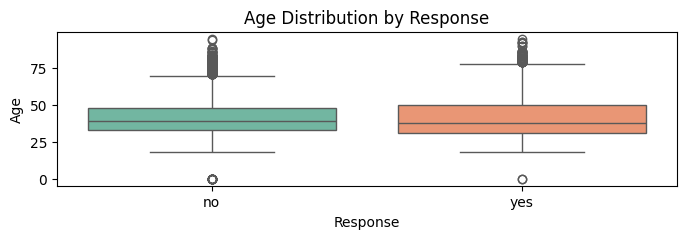

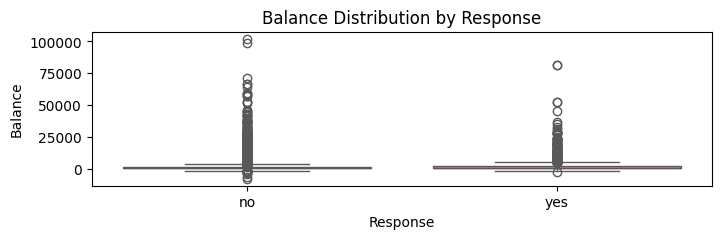

In [35]:
# checking for outliers in age column with respect to response

plt.figure(figsize=(8, 2))
sns.boxplot(x='response', y='age', data=df, palette='Set2')
plt.title('Age Distribution by Response')
plt.xlabel('Response')
plt.ylabel('Age')
plt.show()

# checking for outliers in balance column with respect to response

plt.figure(figsize=(8, 2))
sns.boxplot(x='response', y='balance', data=df, palette='Set2')
plt.title('Balance Distribution by Response')
plt.xlabel('Response')
plt.ylabel('Balance')
plt.show()


## Feature Engineering

In [80]:
# Create age groups
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 20, 30, 40, 50, 60, 100],
                         labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'],
                         right=False)

# Create balance categories
df['balance_category'] = pd.qcut(df['balance'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Create salary categories
df['salary_category'] = pd.qcut(df['salary'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['job', 'education', 'marital', 'housing', 'loan','default','response']
for col in categorical_cols:
    df[f'{col}_encoded'] = le.fit_transform(df[col])
# # Encode 'response' as 1 (yes) and 0 (no)
# df['response_encoded'] = df['response'].apply(lambda x: 1 if x == 'yes' else 0)

# Univariate analysis)

In [42]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mstats

In [44]:
df['marital'].value_counts(normalize=True)

marital
married     0.601912
single      0.282907
divorced    0.115181
Name: proportion, dtype: float64

In [46]:
sns.countplot(df['marital'])
for i,v in enumerate(df['marital'].value_counts()):
    plt.text(i-.15,v-1100,str(v))

In [47]:
sns.countplot(df['job'])
plt.xticks(rotation=90)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0.0, 0, '0'),
  Text(5000.0, 0, '5000'),
  Text(10000.0, 0, '10000'),
  Text(15000.0, 0, '15000'),
  Text(20000.0, 0, '20000'),
  Text(25000.0, 0, '25000'),
  Text(30000.0, 0, '30000')])

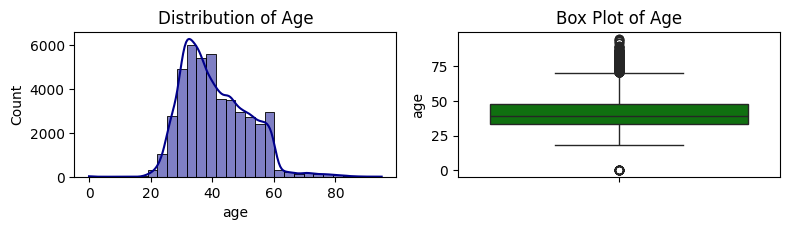

In [55]:
plt.figure(figsize=(8, 4))  # dimension of the graphs

plt.subplot(2, 2, 1)  # defining the position of the 1st graph 
sns.histplot(df['age'], bins=30, kde=True, color='darkblue') # Histogram for Age
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)   # defining the position of the 2nd graph
sns.boxplot(y=df['age'], color='green') # Box Plot for Age
plt.title('Box Plot of Age')
# plt.subplot(2, 1, 2)  # defining the position of the 3rd graph
# sns.kdeplot(df['age'], color='red', fill=True) # KDE Plot for Age
# plt.title('KDE of Age')

plt.tight_layout()
plt.show()

In [57]:
df['age'][df['age']>70].count()

487

## Univariate Analysis for 'salary'

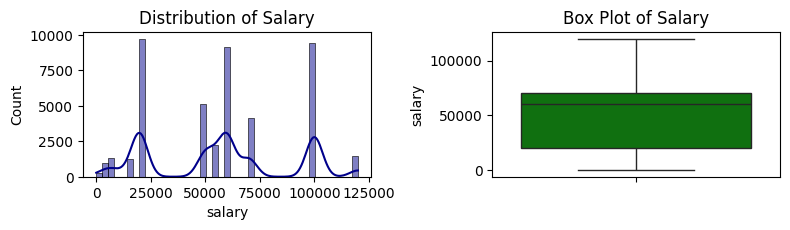

In [60]:
plt.figure(figsize=(8, 4))  # dimension of the graphs

plt.subplot(2, 2, 1)  # defining the position of the 1st graph 
sns.histplot(df['salary'],kde=True, color='darkblue') # Histogram for salary
plt.title('Distribution of Salary')

plt.subplot(2, 2, 2)   # defining the position of the 2nd graph
sns.boxplot(y=df['salary'], color='green') # Box Plot for salary
plt.title('Box Plot of Salary')

plt.tight_layout()
plt.show()

## Univariate Analysis for 'balance'

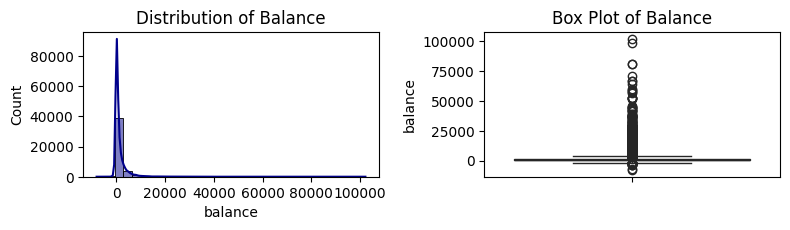

In [63]:
plt.figure(figsize=(8, 4)) # dimensions of graph

plt.subplot(2, 2, 1)  # showing the position of the 1st graph
sns.histplot(df['balance'], bins=30, kde=True, color='darkblue') # Histogram for Balance
plt.title('Distribution of Balance')

plt.subplot(2, 2, 2) # showing the position of the 2nd graph
sns.boxplot(y=df['balance'], color='green') # Box Plot for Balance
plt.title('Box Plot of Balance')

plt.tight_layout()
plt.show()

# Bivariate Analysis

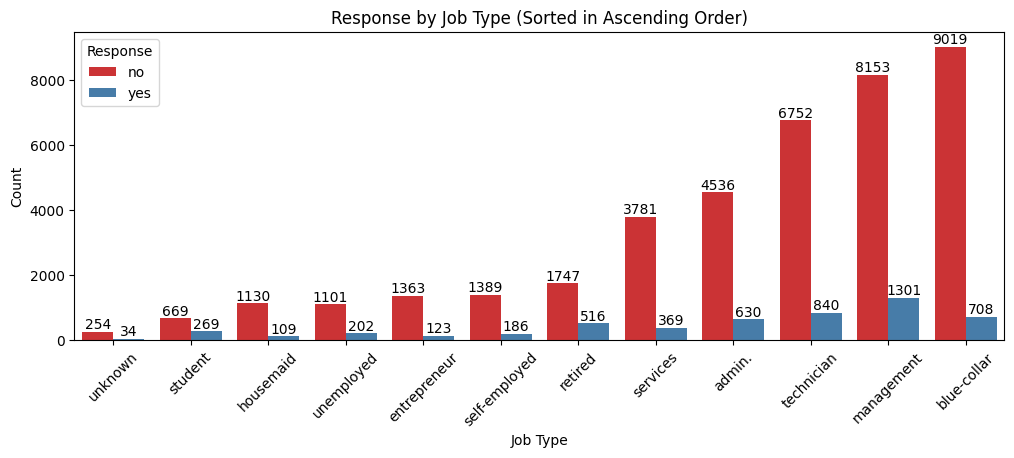


Count of Responses by Job :


0       1            2            3             4   \
job       admin.  admin.  blue-collar  blue-collar  entrepreneur   
response      no     yes           no          yes            no   
Count       4536     630         9019          708          1363   

                    5          6          7           8           9        10  \
job       entrepreneur  housemaid  housemaid  management  management  retired   
response           yes         no        yes          no         yes       no   
Count              123       1130        109        8153        1301     1747   

               11             12             13        14        15       16  \
job       retired  self-employed  self-employed  services  services  student   
response      yes             no            yes        no       yes       no   
Count         516           1389            186      3781       369      669   

               17          18          19          20          21       22  \
job       student  technician  technician  unemployed  unemployed  unknown   
response      yes          no         yes          no         yes       no   
Count         269        6752         840        1101         202      254   

               23  
job       unknown  
response      yes  
Count          34

In [70]:
# Analyzing Job and response relation

sorted_order = df['job'].value_counts(ascending=True).index # Sorting the 'job' categories by the count of responses in ascending order

plt.figure(figsize=(12, 4)) # visualization
A=sns.countplot(x='job', hue='response', data=df, palette='Set1', order=sorted_order)
plt.title('Response by Job Type (Sorted in Ascending Order)')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response')
for i in A.containers:
    A.bar_label(i)  # to show number values at the end of the bar
plt.show()

# Count responses by Job
Job_response_counts = df.groupby(['job', 'response']).size().reset_index(name='Count')
print("\nCount of Responses by Job :")
Job_response_counts.T


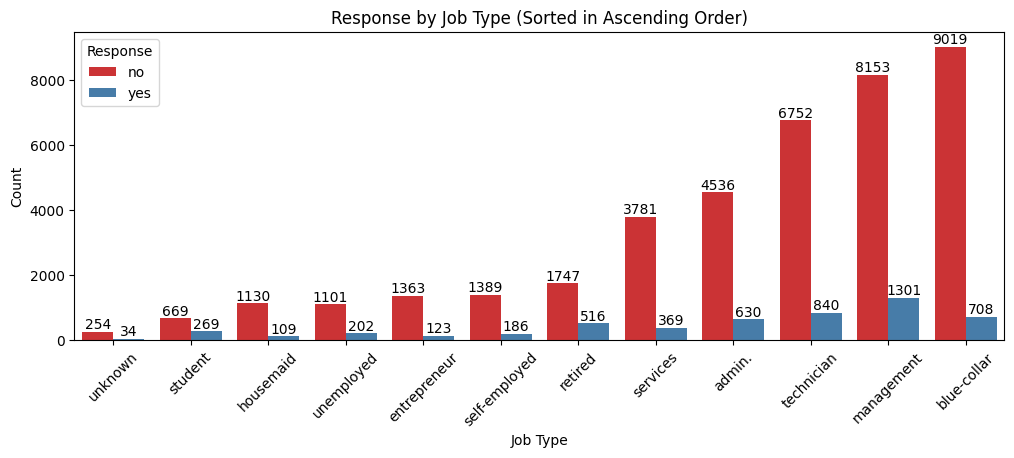

In [72]:
# Analyzing Job and response relation

sorted_order = df['job'].value_counts(ascending=True).index # Sorting the 'Job' categories by the count of responses in ascending order

plt.figure(figsize=(12, 4)) # visualization
A=sns.countplot(x='job', hue='response', data=df, palette='Set1', order=sorted_order)
plt.title('Response by Job Type (Sorted in Ascending Order)')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response')
for i in A.containers:
    A.bar_label(i)  # to show number values at the end of the bar
plt.show()


In [76]:
# Count responses by Job
Job_response_counts = df.groupby(['job', 'response']).size().reset_index(name='Count')
print("\nCount of Responses by Job :")
Job_response_counts.T


Count of Responses by Job :


0       1            2            3             4   \
job       admin.  admin.  blue-collar  blue-collar  entrepreneur   
response      no     yes           no          yes            no   
Count       4536     630         9019          708          1363   

                    5          6          7           8           9        10  \
job       entrepreneur  housemaid  housemaid  management  management  retired   
response           yes         no        yes          no         yes       no   
Count              123       1130        109        8153        1301     1747   

               11             12             13        14        15       16  \
job       retired  self-employed  self-employed  services  services  student   
response      yes             no            yes        no       yes       no   
Count         516           1389            186      3781       369      669   

               17          18          19          20          21       22  \
job       student  technician  technician  unemployed  unemployed  unknown   
response      yes          no         yes          no         yes       no   
Count         269        6752         840        1101         202      254   

               23  
job       unknown  
response      yes  
Count          34

<Figure size 1000x400 with 0 Axes>

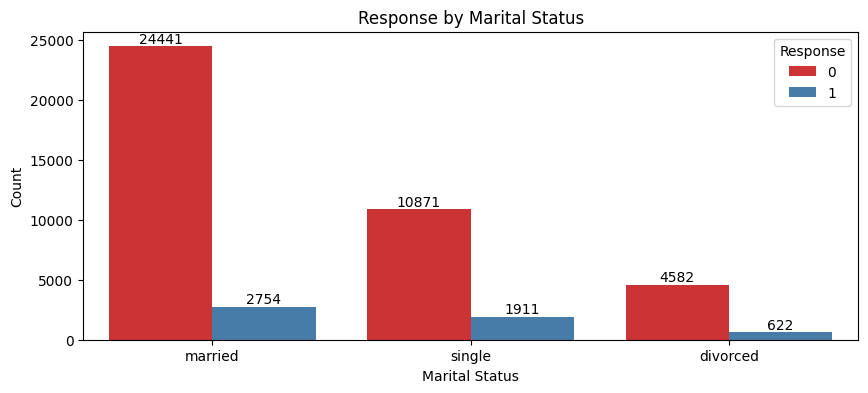


Count of Responses by Marital Status:


0         1        2        3       4       5
marital           divorced  divorced  married  married  single  single
response_encoded         0         1        0        1       0       1
Count                 4582       622    24441     2754   10871    1911

In [84]:
# Marital status and campaign success

plt.figure(figsize=(10, 4))
A=sns.countplot(x='marital', hue='response_encoded', data=df, palette='Set1')
plt.title('Response by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Response')
for i in A.containers:
    A.bar_label(i)  # to show number values at the end of the bar
plt.show()

# Count responses by Marital Status
marital_response_counts = df.groupby(['marital', 'response_encoded']).size().reset_index(name='Count')
print("\nCount of Responses by Marital Status:")
marital_response_counts.T

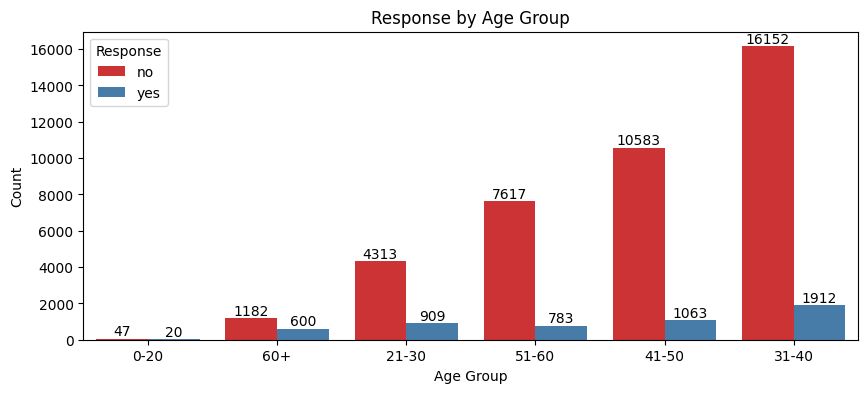

In [88]:
# Bar plot to show the relationship between age_group and response_encoded

sorted_order = df['age_group'].value_counts(ascending=True).index # sorting age group in ascendign order
plt.figure(figsize=(10,4))
A=sns.countplot(data=df, x='age_group', hue='response', palette='Set1',order=sorted_order)
plt.title('Response by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Response')
for i in A.containers:
    A.bar_label(i)  # to show number values at the end of the bar
plt.show()

## Categorical Variables Analysis

In [91]:
# Count the responses based on housing loan status
housing_loan_response = df.groupby(['housing', 'response']).size().unstack(fill_value=0)

housing_loan_response.index = ['No Housing Loan', 'With Housing Loan']# Rename the index and columns for better clarity
housing_loan_response.columns = ['No Response', 'Yes Response']

total_responses = housing_loan_response.sum(axis=1)# Calculate the total responses for each housing loan status

# Calculate the percentage of positive responses
housing_loan_response['Positive Response %'] = (housing_loan_response['Yes Response'] / total_responses * 100).round(2)

print("\nCounts and Positive Response Percentage Based on Housing Loan Status:")
housing_loan_response


Counts and Positive Response Percentage Based on Housing Loan Status:


No Response  Yes Response  Positive Response %
No Housing Loan          16716          3353                16.71
With Housing Loan        23178          1934                 7.70

In [93]:
# Count the responses based on loan status
loan_response = df.groupby(['loan', 'response']).size().unstack(fill_value=0)

loan_response.index = ['No Loan', 'With Loan']# Rename the index and columns for better clarity
loan_response.columns = ['No Response', 'Yes Response']

total_responses_loan = loan_response.sum(axis=1)# Calculate the total responses for each loan status

# Calculate the percentage of positive responses
loan_response['Positive Response %'] = (loan_response['Yes Response'] / total_responses_loan * 100).round(2)

print("\nCounts and Positive Response Percentage Based on Loan Status:")
loan_response


Counts and Positive Response Percentage Based on Loan Status:


No Response  Yes Response  Positive Response %
No Loan          33140          4803                12.66
With Loan         6754           484                 6.69

In [95]:
# Count the responses based on default status
default_response = df.groupby(['default', 'response']).size().unstack(fill_value=0)

default_response.index = ['No Default Loan', 'With Default Loan'] #Rename the index and columns for better clarity
default_response.columns = ['No Response', 'Yes Response']

total_responses_default = default_response.sum(axis=1)#Calculate the total responses for each default status

#  Calculate the percentage of positive responses
default_response['Positive Response %'] = (default_response['Yes Response'] / total_responses_default * 100).round(2)

print("\nCounts and Positive Response Percentage Based on Default Status:")
default_response


Counts and Positive Response Percentage Based on Default Status:


No Response  Yes Response  Positive Response %
No Default Loan          39131          5235                11.80
With Default Loan          763            52                 6.38

#### Visualizing the affact of Loan, Housing_loan and Default_loan on campaign performance

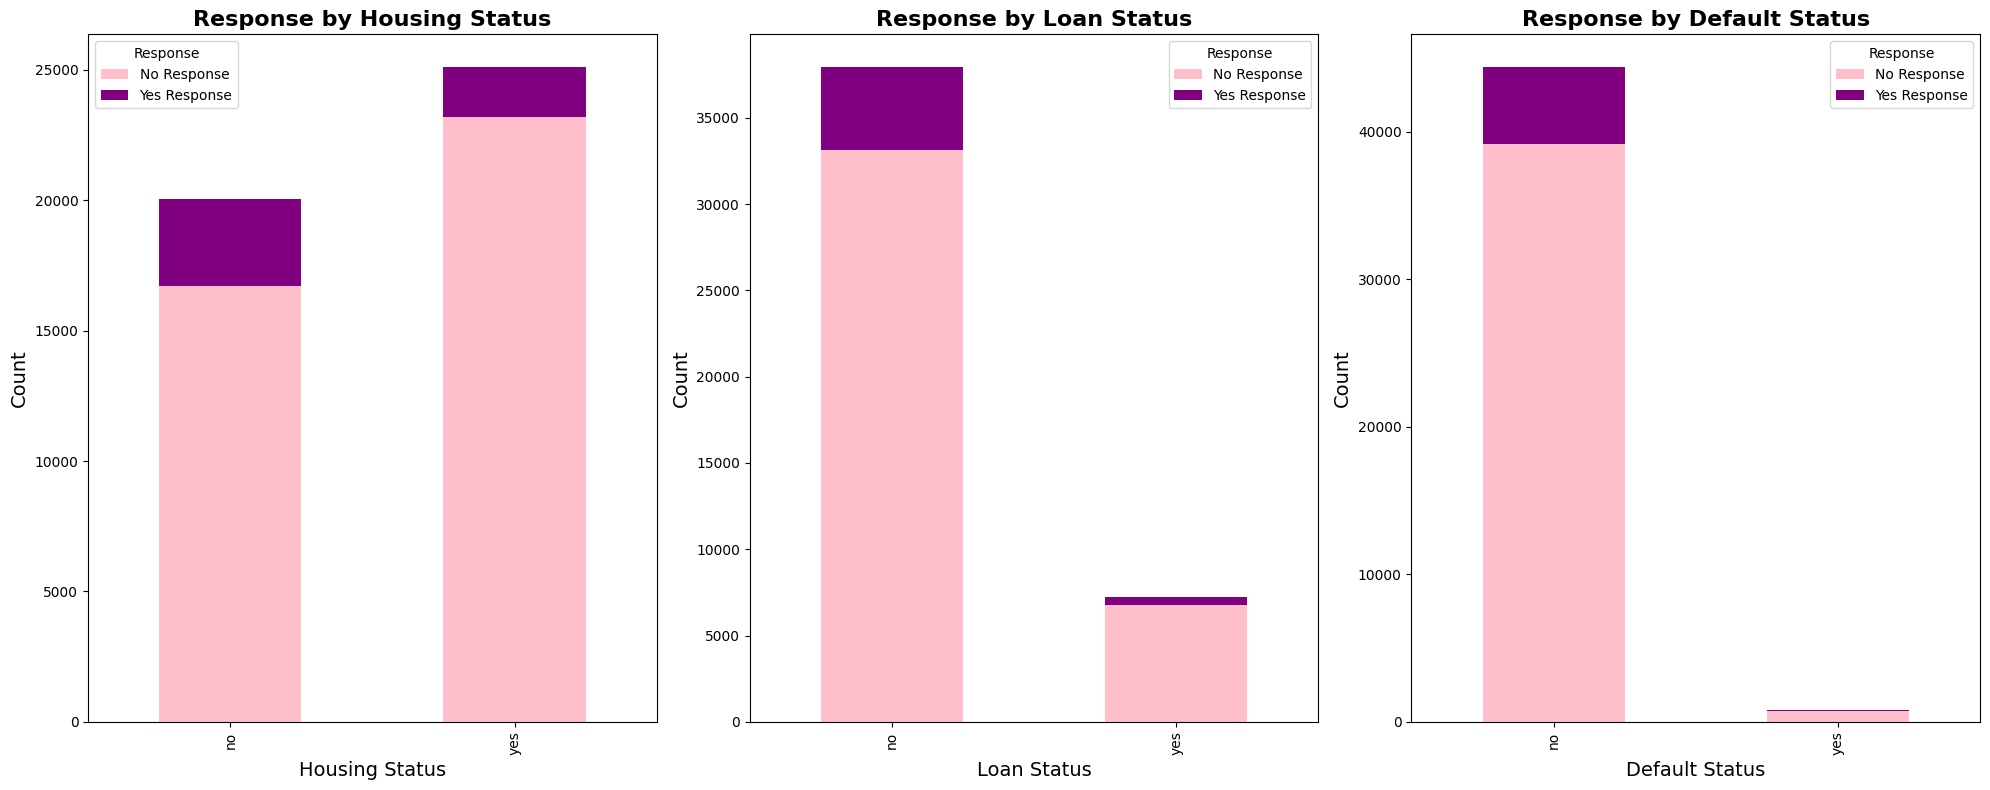

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8)) # Set up the figure and axes for subplots

# Housing response counts
housing_response = df.groupby(['housing', 'response']).size().unstack(fill_value=0)
housing_response.plot(kind='bar', stacked=True, ax=axes[0], color=['pink', 'purple'])
axes[0].set_title('Response by Housing Status', fontsize=16, fontweight='bold', color='black')
axes[0].set_xlabel('Housing Status', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].legend(title='Response', labels=['No Response', 'Yes Response'])

# Loan response counts
loan_response = df.groupby(['loan', 'response']).size().unstack(fill_value=0)
loan_response.plot(kind='bar', stacked=True, ax=axes[1], color=['pink', 'purple'])
axes[1].set_title('Response by Loan Status', fontsize=16, fontweight='bold', color='black')
axes[1].set_xlabel('Loan Status', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].legend(title='Response', labels=['No Response', 'Yes Response'])

# Default loan response counts
default_response = df.groupby(['default', 'response']).size().unstack(fill_value=0)
default_response.plot(kind='bar', stacked=True, ax=axes[2], color=['pink', 'purple'])
axes[2].set_title('Response by Default Status', fontsize=16, fontweight='bold', color='black')
axes[2].set_xlabel('Default Status', fontsize=14)
axes[2].set_ylabel('Count', fontsize=14)
axes[2].legend(title='Response', labels=['No Response', 'Yes Response'])

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

## Temporal Analysis

In [101]:
# Count responses by month
monthly_responses = df.groupby(['month_of', 'response']).size().unstack(fill_value=0)
monthly_responses.T

month_of   apr   aug  dec   feb   jan   jul   jun  mar    may   nov  oct  sep
response                                                                     
no        2352  5547  114  2206  1260  6260  4785  229  12858  3560  415  308
yes        577   688  100   439   142   626   544  247    930   403  323  268

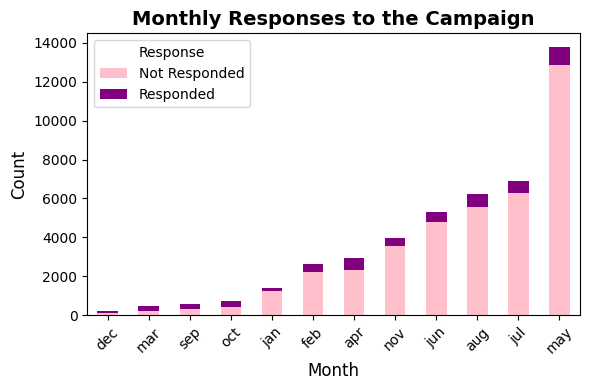

In [103]:
# Plot the monthly response counts
monthly_responses['Total'] = monthly_responses.sum(axis=1)
monthly_responses_sorted = monthly_responses.sort_values(by='Total', ascending=True).drop('Total', axis=1)
#A new column Total is created by summing across both "Not Responded" and "Responded" categories.
# then sorted by the Total column in ascending order.Total column is dropped after sorting

monthly_responses_sorted.plot(kind='bar', stacked=True, figsize=(6, 4), color=['pink', 'purple'])
plt.title('Monthly Responses to the Campaign', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Response', labels=['Not Responded', 'Responded'])
plt.tight_layout()
plt.show()

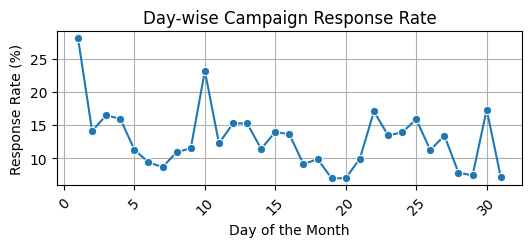

In [105]:
# Groupby day and calculate the response counts

day_response = df.groupby(['day', 'response']).size().unstack(fill_value=0)
# Calculate response rates
day_response['response_rate'] = (day_response['yes'] / (day_response['yes'] + day_response['no'])) * 100

plt.figure(figsize=(6, 2)) # Plotting the response rates by day
sns.lineplot(data=day_response, x=day_response.index, y='response_rate', marker='o')
plt.title('Day-wise Campaign Response Rate')
plt.xlabel('Day of the Month')
plt.ylabel('Response Rate (%)')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid()
plt.show()

## Correlation Analysis

### correlation matrix of all numeric columns

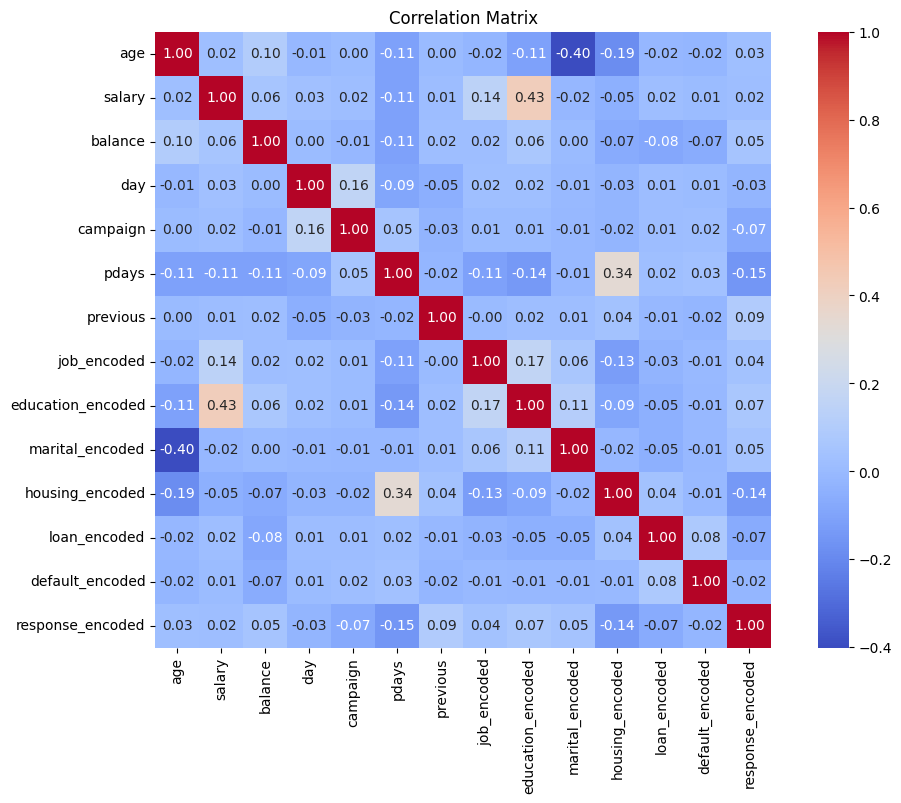

In [109]:
df_num = df.select_dtypes(include=['number']) # Creating a dataframe with only numeric columns

correlation_matrix = df_num.corr() #  Calculate the correlation matrix

plt.figure(figsize=(12, 8)) #  Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
#plt.xticks(rotation=45)
plt.show()

Correlation of independent variables with the target variable(response):
 response_encoded     1.000000
previous             0.093294
education_encoded    0.066200
balance              0.052850
marital_encoded      0.045535
job_encoded          0.040510
age                  0.025079
salary               0.020042
default_encoded     -0.022438
day                 -0.028306
loan_encoded        -0.068140
campaign            -0.073176
housing_encoded     -0.139210
pdays               -0.152355
Name: response_encoded, dtype: float64


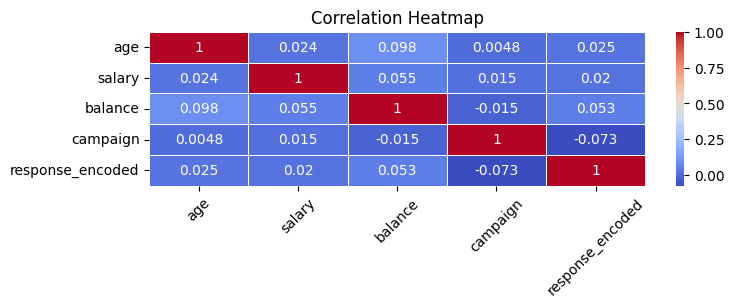

In [114]:
#  Correlation with the response
target_corr = correlation_matrix['response_encoded'].sort_values(ascending=False)
print("Correlation of independent variables with the target variable(response):\n", target_corr)
# Correlation matrix to check relation between specific features and response_formatted
corr_matrix = df[['age','salary', 'balance', 'campaign', 'response_encoded']].corr()

# Heatmap
plt.figure(figsize=(8, 2))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

## Outlier Detection and Handling

### Detect outliers using the IQR method

In [118]:
Feature = ['age', 'salary', 'balance', 'pdays', 'campaign', 'previous']  # Columns to check for outliers

def detect_outliers_iqr(df, columns):  # Function to detect outliers using the IQR method
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25) # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR  # Define lower and upper bounds for outliers
        upper_bound = Q3 + 1.5 * IQR
        
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers[col] = len(outlier_indices)
        
    return outliers

outlier_counts = detect_outliers_iqr(df, Feature) # Check for outliers using the IQR method
print("Outlier counts for each column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

Outlier counts for each column:
age: 507 outliers
salary: 0 outliers
balance: 4728 outliers
pdays: 49 outliers
campaign: 3062 outliers
previous: 8251 outliers


### Visualizing outliers of key features

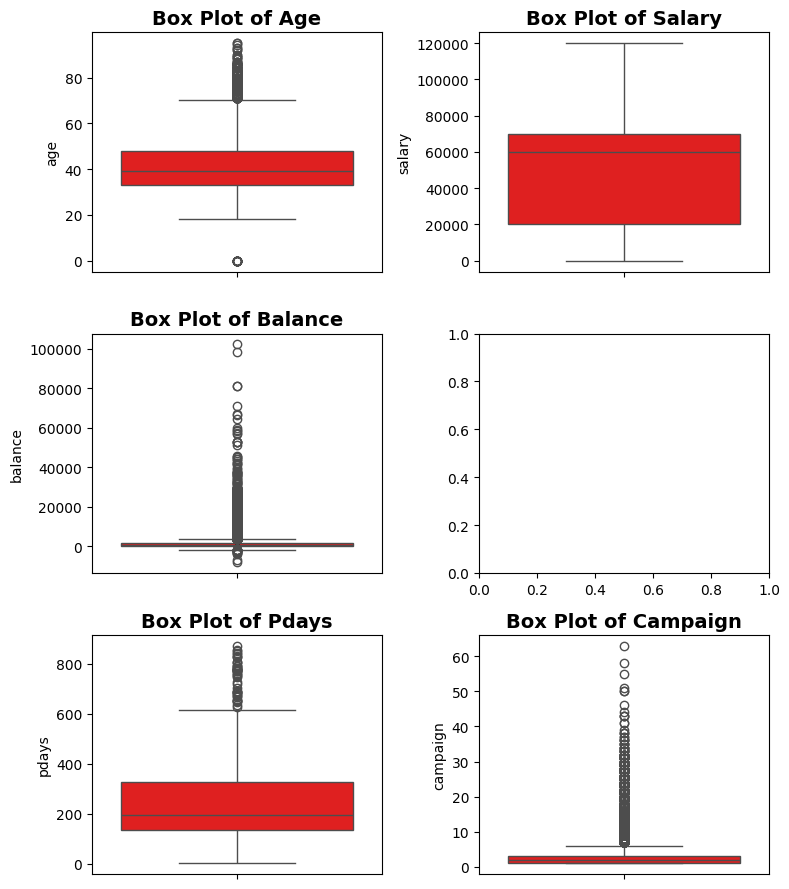

In [123]:
Features = ['age', 'salary', 'balance', 'pdays', 'campaign'] # Define the key features we want to visualize

# Set up the figure and axes for subplots
num_columns = len(Features)
fig, axes = plt.subplots(num_columns // 2 + num_columns % 2, 2, figsize=(8, 3 * (num_columns // 2 + num_columns % 2)))

# Create box plots for the specified columns
sns.boxplot(data=df, y='age', ax=axes[0, 0], color='red')
axes[0, 0].set_title('Box Plot of Age', fontsize=14, fontweight='bold')

sns.boxplot(data=df, y='salary', ax=axes[0, 1], color='red')
axes[0, 1].set_title('Box Plot of Salary', fontsize=14, fontweight='bold')

if num_columns > 2:
    sns.boxplot(data=df, y='balance', ax=axes[1, 0], color='red')
    axes[1, 0].set_title('Box Plot of Balance', fontsize=14, fontweight='bold')

if num_columns > 3:
    sns.boxplot(data=df, y='pdays', ax=axes[2, 0], color='red')
    axes[2, 0].set_title('Box Plot of Pdays', fontsize=14, fontweight='bold')

if num_columns > 4:
    sns.boxplot(data=df, y='campaign', ax=axes[2, 1], color='red')
    axes[2, 1].set_title('Box Plot of Campaign', fontsize=14, fontweight='bold')

plt.tight_layout() # Adjust layout to avoid overlap
plt.show()

## Handling the outliers

In [126]:
# # List of features to process
features = ['age', 'salary', 'balance', 'pdays', 'campaign']

# Copy the original DataFrame to df_cleaned
df_cleaned = df.copy()

In [128]:
# # 1. Cap and Floor Outliers (Winsorization)
# Applying winsorization for 5th and 95th percentiles to each feature individually
df_cleaned[features] = df_cleaned[features].apply(lambda x: mstats.winsorize(x, limits=[0.05, 0.05]))
#df_cleaned

In [130]:
# 2. Remove Outliers using IQR method
Q1 = df_cleaned[features].quantile(0.25)
Q3 = df_cleaned[features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only rows where data points fall within bounds across all features
df_cleaned = df_cleaned[((df_cleaned[features] >= lower_bound) & (df_cleaned[features] <= upper_bound)).all(axis=1)]
#df_cleaned

In [132]:
# # 3. Impute Outliers with Median
medians = df_cleaned[features].median()
# Impute outliers using the where method with axis defined
df_cleaned[features] = df_cleaned[features].where(
    (df_cleaned[features] >= lower_bound) & (df_cleaned[features] <= upper_bound), 
    other=medians,
    axis=0 )  # Specify that the operation should be done along columns

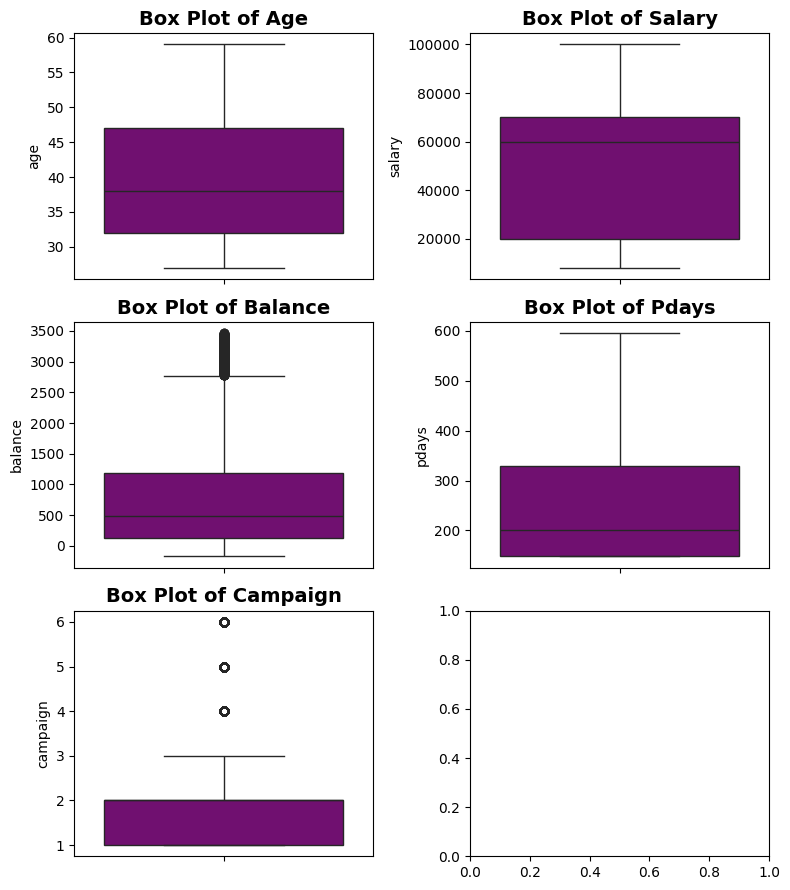

In [136]:
# Set up the figure and axes for subplots
num_columns = len(features)

# setting the position of the graphs
fig, axes = plt.subplots(num_columns // 2 + num_columns % 2, 2, figsize=(8, 3 * (num_columns // 2 + num_columns % 2)))

# Create box plots for the specified columns
sns.boxplot(data=df_cleaned, y='age', ax=axes[0, 0], color='purple')
axes[0, 0].set_title('Box Plot of Age', fontsize=14, fontweight='bold')

sns.boxplot(data=df_cleaned, y='salary', ax=axes[0, 1], color='purple')
axes[0, 1].set_title('Box Plot of Salary', fontsize=14, fontweight='bold')

if num_columns > 2:
    sns.boxplot(data=df_cleaned, y='balance', ax=axes[1, 0], color='purple')
    axes[1, 0].set_title('Box Plot of Balance', fontsize=14, fontweight='bold')

if num_columns > 3:
    sns.boxplot(data=df_cleaned, y='pdays', ax=axes[1, 1], color='purple')
    axes[1, 1].set_title('Box Plot of Pdays', fontsize=14, fontweight='bold')

if num_columns > 4:
    sns.boxplot(data=df_cleaned, y='campaign', ax=axes[2, 0], color='purple')
    axes[2, 0].set_title('Box Plot of Campaign', fontsize=14, fontweight='bold')


plt.tight_layout() # Adjust layout to avoid overlap
plt.show()